In [7]:
!pip install tensorflow

  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.1.1-py2.py3-none-any.whl (146 kB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=84c65974a34428ca939a98bcd83b1fbe0be92d7b23cdab297b4c8a4d8ee6293e
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached flatbuffers-2.0-py2.py3-none-any.whl (26 kB)
  Using cached keras-2.7.0-py2.py3-none-any.whl (1.3 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached protobuf-3.19.1-cp38-cp38-win_amd64.whl (895 kB)
  Using cached tensorflow_estimator-2.7.0-py2.py3-none-any.whl (463 kB)
  Using cached tensorboard-2.7.0-py3-none-any.whl (5.8 MB)
  Using cached grpcio-1.41.1-cp38-cp38-win_amd64.whl (3.2 MB)


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [2]:
data = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')

data.dropna(inplace=True)
data.drop(['Timestamp'],axis=1,inplace=True)

In [3]:
data

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...
4857372,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


<AxesSubplot:>

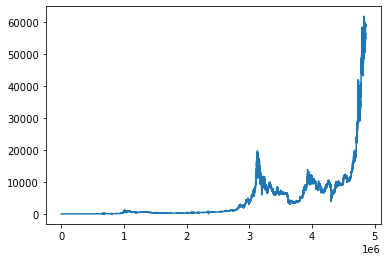

In [4]:
data['Close'].plot()

<AxesSubplot:>

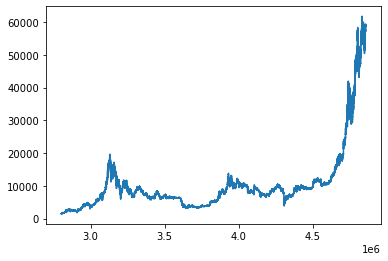

In [5]:
data.tail(2000000)['Close'].plot()

<AxesSubplot:>

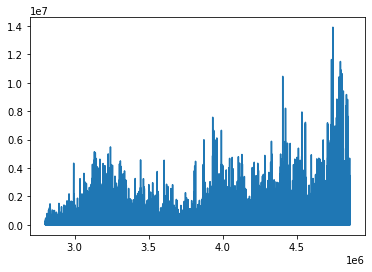

In [45]:
data.tail(2000000)['Volume_(Currency)'].plot()

<AxesSubplot:>

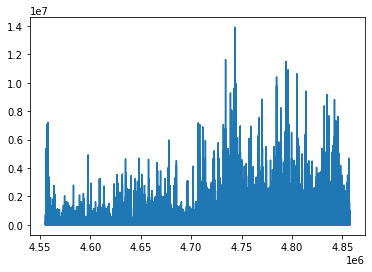

In [46]:
data.tail(300000)['Volume_(Currency)'].plot()

<AxesSubplot:>

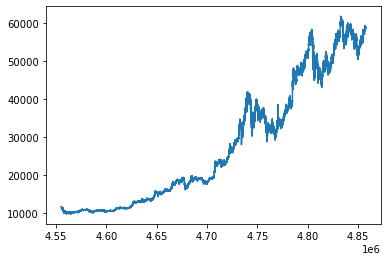

In [6]:
data.tail(300000)['Close'].plot()

<AxesSubplot:>

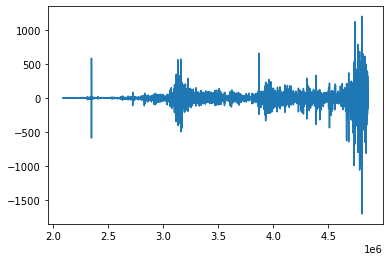

In [7]:
data.diff().tail(2500000)['Close'].plot()

In [18]:
close_p = data.diff().tail(300000)['Close'].to_numpy()

In [22]:
scaler = MinMaxScaler(feature_range=(-1,1))
scale_close_p = scaler.fit_transform(close_p.reshape(-1,1))

In [179]:
t = data.reset_index()[['Close']]
t

,Close
0,4.39
1,4.39
2,4.57
3,4.58
4,4.58
...,...
3613764,58686.00
3613765,58685.81
3613766,58723.84
3613767,58760.59


In [188]:
t['Close'].values[5:10].reshape(-1,1)

array([[4.84],
       [5.  ],
       [5.  ],
       [5.32],
       [5.14]])

In [199]:
def create_data(df, n_in, n_out):
    x = np.ndarray((len(df)-n_in-n_out+1, n_in, len(df.columns)))
    y = np.ndarray((len(df)-n_in-n_out+1, n_out, 1))
    for i in range(len(df)-n_in-n_out+1):
        x[i] = df.values[i:i+n_in]
        y[i] = df['Close'].values[i+n_in:i+n_in+n_out].reshape(-1,1)
    return x,y

In [ ]:
x,y = create_data(data.reset_index()[['Close']], 100, 5)

In [ ]:
len(x),len(y)

In [ ]:
len(x[0]),len(y[0])